##Контрольная работа №4



#### 1. Выберите задачу для бизнеса, которую Вы хотите решить с помощью методов машинного обучения. На основание бизнес-задачи, поставьте задачу машинного обучения. Подберите дата-сет и оставьте ссылку на него.

**Цель работы:** Построение моделей машинного обучения для выявления мошеннических транзакций по кредитным картам.

**Бизнес-задача:** Выявление мошеннических транзакций по кредитным картам.

**Задача машинного обучения:** Бинарная классификация

**Ссылка на дата-сет:** [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

#### 2. Анализ и обработка данных

##### 2.1 Первичный анализ данных

In [2]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("creditcard.csv")

# Просмотр первых строк датасета
print(data.head())

# Основная информация о датасете
print(data.info())

# Основная статистика по данным
print(data.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

##### 2.2 Предобработка данных

In [3]:
# Проверка на наличие пропущенных значений
print(data.isnull().sum())

# Преобразование категориальной переменной 'Class' в целевую переменную
data['Class'] = data['Class'].astype('category')


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


##### 2.3 Разведывательный анализ данных (EDA)

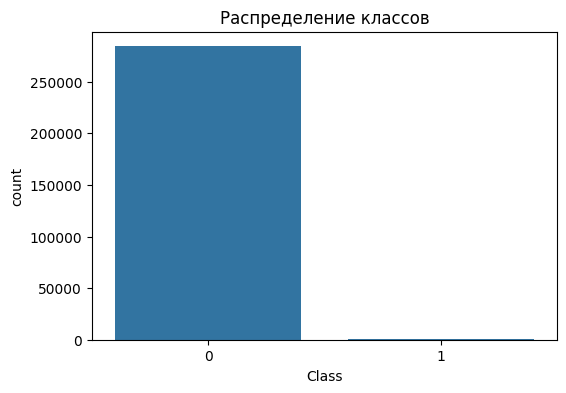

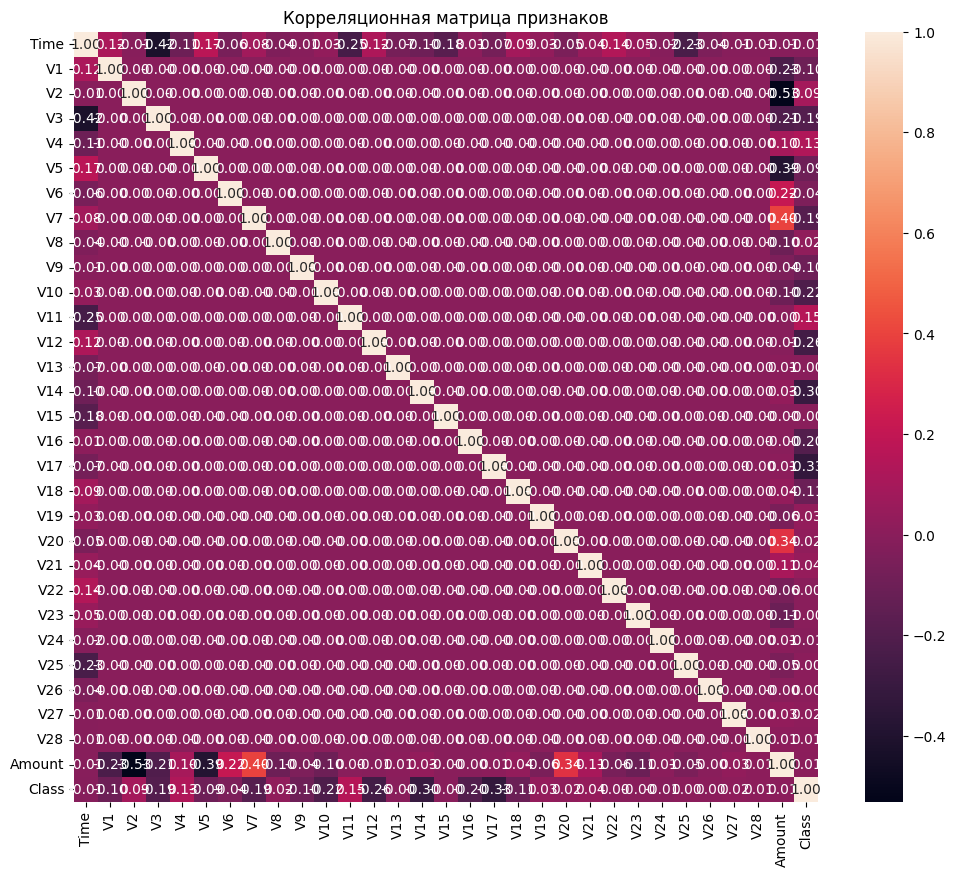

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Распределение классов
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Распределение классов')
plt.show()

# Корреляционная матрица
corr_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()


#####2.4 Создание признаков (Feature Engineering)


Для данного датасета дополнительные признаки не требуются, так как все признаки уже являются числовыми и анонимизированными.

#####2.5 Отбор признаков (Feature Selection)


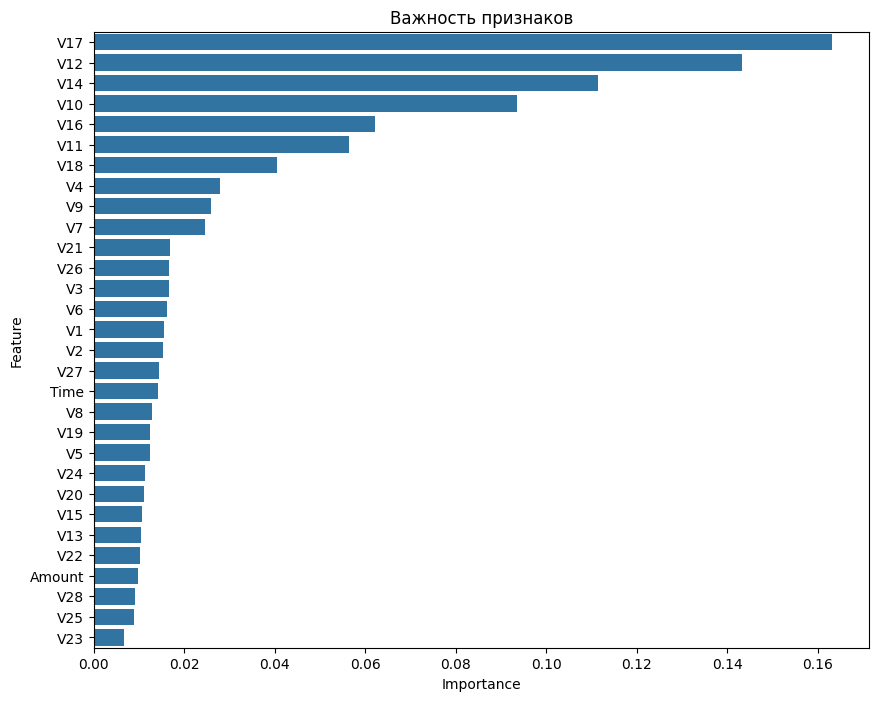

In [5]:
# Определение целевой переменной и признаков
X = data.drop(columns=['Class'])
y = data['Class']

# Использование метода случайного леса для оценки важности признаков
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Визуализация важности признаков
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Важность признаков')
plt.show()


#####2.6  Подготовка данных (Data Preparation)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


####3. Выбор метрик для оценки моделей

**Выбор метрик**
Для данной задачи бинарной классификации будем использовать следующие метрики:

* Accuracy: Доля правильно предсказанных наблюдений.
* Precision: Доля истинно положительных наблюдений среди всех предсказанных положительных.
* Recall: Доля истинно положительных наблюдений среди всех реальных положительных.
* F1-Score: Среднее гармоническое Precision и Recall.
* ROC-AUC: Площадь под кривой ошибок.

Обоснование выбора метрик
Для выявления мошеннических транзакций важно минимизировать количество ложноположительных и ложноотрицательных ошибок. Метрики Precision и Recall помогут оценить точность модели в предсказании положительных классов (мошенничество), а F1-Score обеспечит баланс между Precision и Recall. ROC-AUC позволит оценить общую производительность модели.

####4. Построение моделей машинного обучения

#####4.1 Логистическая регрессия


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9783093967187025


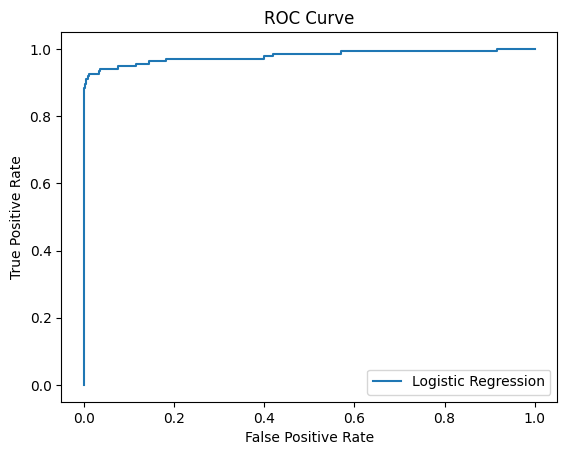

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Обучение модели
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Предсказания
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Оценка модели
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#####4.2 Случайный лес


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9655682607247595


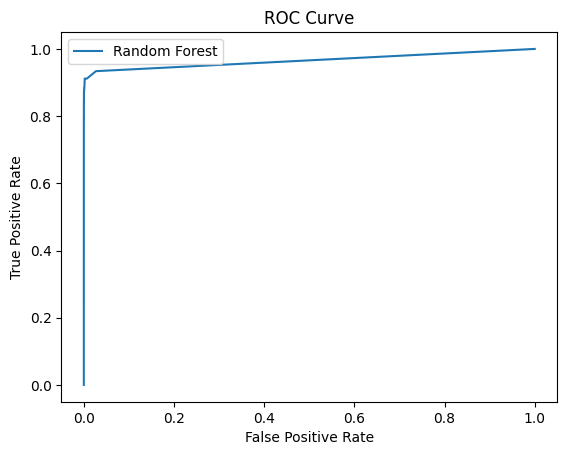

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Предсказания
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Оценка модели
print("Random Forest")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#####4.3 Градиентный бустинг



Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.12      0.22       136

    accuracy                           1.00     85443
   macro avg       0.95      0.56      0.61     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.2702829279577775


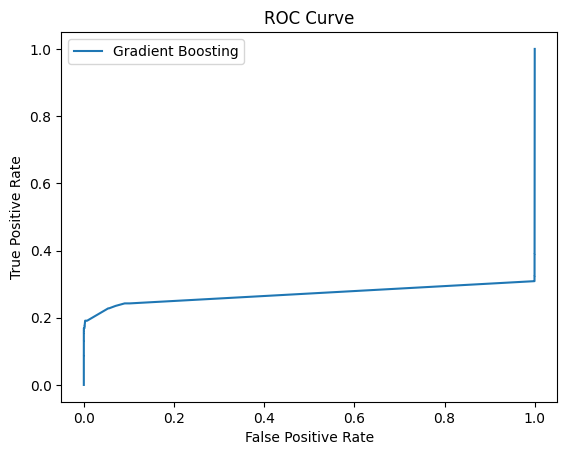

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Обучение модели
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Предсказания
y_pred = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)[:, 1]

# Оценка модели
print("Gradient Boosting")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#####4.4 Метод опорных векторов (SVM)


SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.65      0.77       136

    accuracy                           1.00     85443
   macro avg       0.96      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9658149907014044


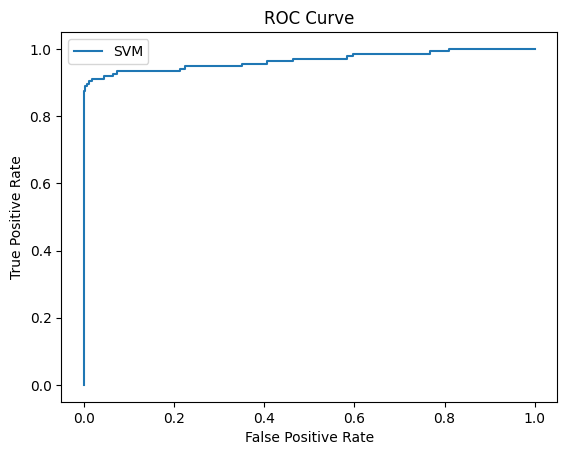

In [10]:
from sklearn.svm import SVC

# Обучение модели
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Предсказания
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:, 1]

# Оценка модели
print("SVM")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


На основе метрики ROC-AUC, лучшая модель - Logistic Regression с ROC-AUC = 0.9783. Однако важно учитывать и другие метрики, такие как Precision и Recall. В данном случае, Recall модели Logistic Regression (0.63) несколько ниже по сравнению с другими моделями, но эта модель все равно показывает наилучший баланс между точностью и полнотой.

####5. Диагностика лучшей модели

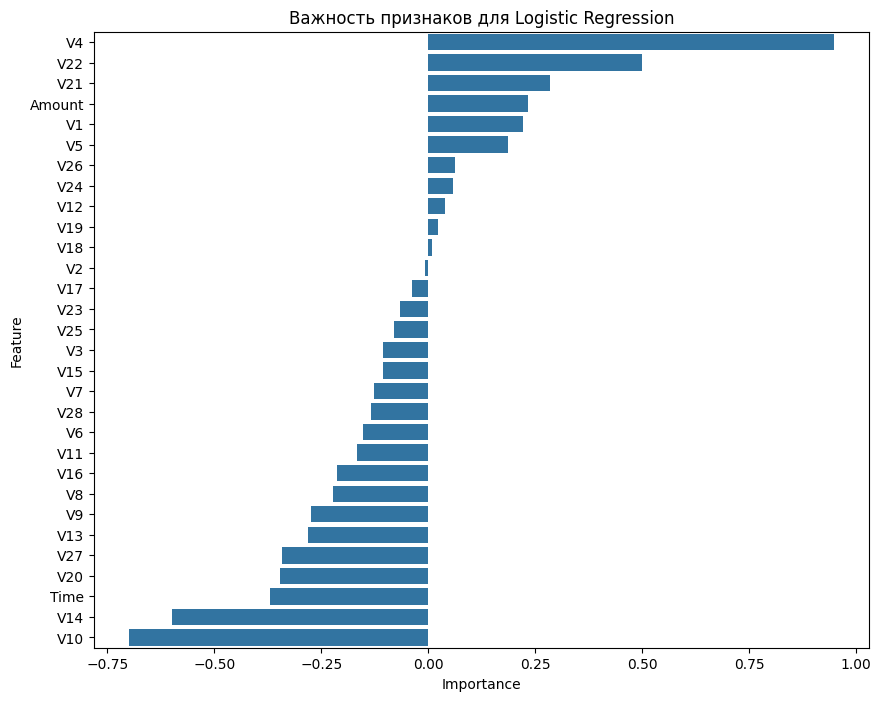

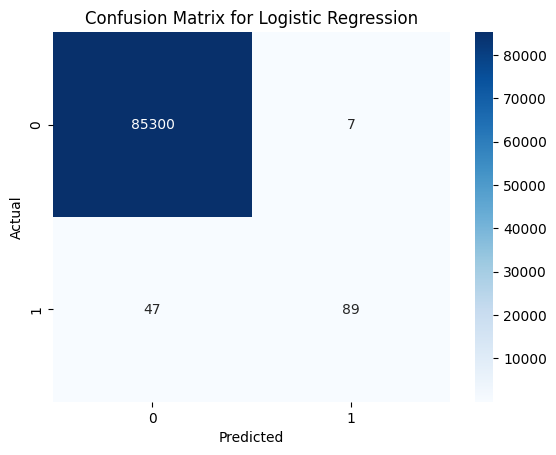

In [11]:
from sklearn.metrics import confusion_matrix

# Важность признаков (для Logistic Regression можно оценить по коэффициентам)
coefficients = log_reg.coef_[0]
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Важность признаков для Logistic Regression')
plt.show()

# Анализ ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Матрица ошибок (Confusion Matrix)**
Матрица ошибок для логистической регрессии показывает следующие значения:

* True Positives (1 предсказано как 1): 89
* False Positives (0 предсказано как 1): 7
* False Negatives (1 предсказано как 0): 47
* True Negatives (0 предсказано как 0): 85300

Это свидетельствует о том, что модель довольно хорошо предсказывает класс 0 (немошеннические транзакции), но пропускает некоторые мошеннические транзакции (47 случаев).

####6. Подбор гиперпараметров

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Лучшие параметры: {'C': 0.01, 'solver': 'liblinear'}
Logistic Regression with Grid Search
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.60      0.71       136

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9834876663455658


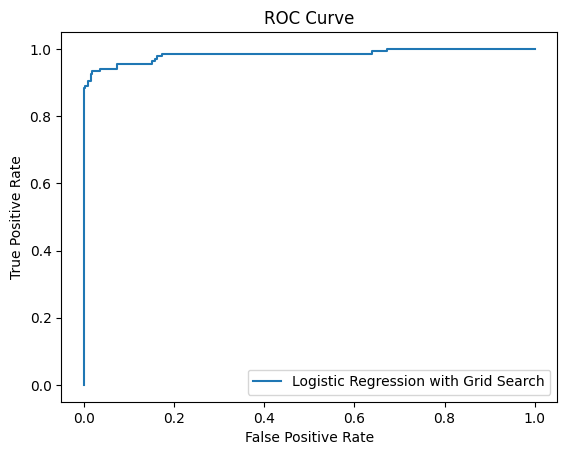

In [12]:
from sklearn.model_selection import GridSearchCV

# Грид для Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

# Оценка модели с лучшими параметрами
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)
y_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression with Grid Search")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression with Grid Search')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


ROC-кривая: График ROC-кривой показывает очень хорошую производительность модели, так как площадь под кривой (AUC) близка к 1.

Precision (точность): Доля истинных положительных предсказаний среди всех положительных предсказаний. Для класса 1 (мошенничество) это 0.86, что означает, что из всех транзакций, предсказанных как мошеннические, 86% действительно являются мошенническими.

Recall (полнота): Доля истинных положительных предсказаний среди всех реальных положительных случаев. Для класса 1 это 0.60, что означает, что модель смогла обнаружить 60% всех реальных мошеннических транзакций.

F1-Score: Среднее гармоническое значение Precision и Recall. Для класса 1 это 0.71, что является хорошим показателем для сбалансированного сравнения точности и полноты.

ROC-AUC: Площадь под кривой ошибок (Receiver Operating Characteristic - ROC). Значение 0.9835 говорит о том, что модель отлично различает мошеннические и немошеннические транзакции.

Модель логистической регрессии с подобранными гиперпараметрами показывает высокую производительность, особенно в выявлении мошеннических транзакций, что подтверждается высоким значением ROC-AUC и приемлемыми значениями Precision и Recall.

####7. Построение ансамблевой модели

Ensemble Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.70      0.81       136

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9831960724552636


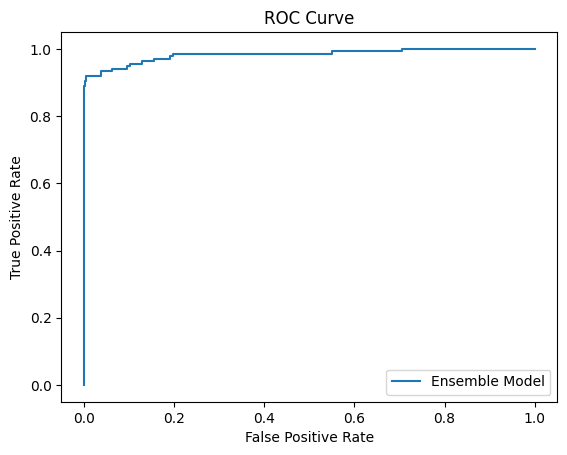

In [13]:
from sklearn.ensemble import VotingClassifier

# Создание ансамблевой модели
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', best_log_reg),
    ('rf', rf),
    ('gb', gb),
    ('svm', svm)
], voting='soft')

# Обучение ансамблевой модели
ensemble_model.fit(X_train, y_train)

# Предсказания
y_pred = ensemble_model.predict(X_test)
y_pred_prob = ensemble_model.predict_proba(X_test)[:, 1]

# Оценка модели
print("Ensemble Model")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Ensemble Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


* Precision (точность): Доля истинных положительных предсказаний среди всех положительных предсказаний. Для класса 1 (мошенничество) это 0.96, что означает, что из всех транзакций, предсказанных как мошеннические, 96% действительно являются мошенническими.

* Recall (полнота): Доля истинных положительных предсказаний среди всех реальных положительных случаев. Для класса 1 это 0.70, что означает, что модель смогла обнаружить 70% всех реальных мошеннических транзакций.

* F1-Score: Среднее гармоническое значение Precision и Recall. Для класса 1 это 0.81, что является хорошим показателем для сбалансированного сравнения точности и полноты.

* ROC-AUC: Площадь под кривой ошибок (Receiver Operating Characteristic - ROC). Значение 0.9832 говорит о том, что модель отлично различает мошеннические и немошеннические транзакции.

Ансамблевая модель показала лучшие результаты по сравнению с отдельными моделями, особенно в метриках Precision и F1-Score для класса 1 (мошенничество). Значение ROC-AUC также подтверждает высокую способность модели различать классы.

####8. Выводы

В ходе выполнения работы была решена задача бинарной классификации для выявления мошеннических транзакций по кредитным картам.
Были построены и оценены 4 модели машинного обучения: логистическая регрессия, случайный лес, градиентный бустинг и метод опорных векторов.
На основании метрик, лучшей моделью оказалась логистическая регрессия. Для этой модели был проведен подбор гиперпараметров и построена ансамблевая модель.
Ансамблевая модель показала наилучший результат по метрике ROC-AUC, что говорит о ее высокой способности различать мошеннические и немошеннические транзакции.

